In [201]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import GridSearchCV, validation_curve

In [202]:
ds = pd.read_csv("C:/Users/tvpia/Desktop/Final project/final-project/your-project/Datasets/ds_flagged.csv")
pd.set_option('max_columns', 150)

In [203]:
ds.drop(columns="Unnamed: 0",inplace=True)

In [204]:
ds.head(1)

,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,DDP1,DDP2,DDP3,DDP4,DDN1,DDN2,DDN3,DDN4,DDM1,DDM2,DDM3,DDM4,age,gender,accuracy,country,HSNScale,HSNS1_flag,HSNS2_flag,HSNS3_flag,HSNS4_flag,HSNS5_flag,HSNS6_flag,HSNS7_flag,HSNS8_flag,HSNS9_flag,HSNS10_flag,DDP1_flag,DDP2_flag,DDP3_flag,DDP4_flag,DDN1_flag,DDN2_flag,DDN3_flag,DDN4_flag,DDM1_flag,DDM2_flag,DDM3_flag,DDM4_flag
0,2,4,5,1,4,5,4,3,3,2,1,1,4,4,2,1,1,1,1,2,2,1,37,2,98,PT,0.62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


We will try to see if we can improve our results by grouping English speaking capitalist countries (US GB AU NL)

In [205]:
eng_cap= ["US","GB","AU","NZ"]

In [206]:
ds["cap_other"]=np.where(ds.country.isin(eng_cap),0,1)

In [207]:
ds.head(5)
ds1 = ds.copy()

In [208]:
ds.cap_other.value_counts()

0    36852
1    15777
Name: cap_other, dtype: int64

In [209]:
ds.drop(columns="country",axis=1,inplace=True)

In [210]:
features = ds[['age','accuracy']]

# Standardize features
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

ds[['age','accuracy']]=features_std

In [211]:
ds.head(1)

,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,DDP1,DDP2,DDP3,DDP4,DDN1,DDN2,DDN3,DDN4,DDM1,DDM2,DDM3,DDM4,age,gender,accuracy,HSNScale,HSNS1_flag,HSNS2_flag,HSNS3_flag,HSNS4_flag,HSNS5_flag,HSNS6_flag,HSNS7_flag,HSNS8_flag,HSNS9_flag,HSNS10_flag,DDP1_flag,DDP2_flag,DDP3_flag,DDP4_flag,DDN1_flag,DDN2_flag,DDN3_flag,DDN4_flag,DDM1_flag,DDM2_flag,DDM3_flag,DDM4_flag,cap_other
0,2,4,5,1,4,5,4,3,3,2,1,1,4,4,2,1,1,1,1,2,2,1,1.03349,2,0.900357,0.62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Let's first define a train test set and then resample the training set to avoid imbalance

In [209]:

X = ds.drop(columns="cap_other",axis=1)
y = ds.cap_other

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.025, random_state=67)
#I deciding to keep 2.5% of the data for testing, since it is already about 2 500 rows

In [151]:
#now lets adress imbalance with Smote

In [211]:
sm = SMOTE(random_state=67)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)
print (y_train.value_counts() , np.bincount(y_train_res))

0    35943
1    15370
Name: cap_other, dtype: int64 [35943 35943]


Random Forest Classifier

In [212]:
model = RandomForestClassifier()
model.fit(x_train_res , y_train_res)

C:\Users\tvpia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [213]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
ac = accuracy_score(y_test, y_pred)
pr = precision_score(y_test, y_pred)
rc = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accuracy:', ac, 'precision:', pr, 'recall:', rc, 'F1:', f1)

accuracy: 0.6747720364741642 precision: 0.42857142857142855 recall: 0.1547911547911548 F1: 0.22743682310469315


In [214]:
cm

array([[825,  84],
       [344,  63]], dtype=int64)

Recall is really bad, maybe there is an issue with the sampling
Lets try both downsample and upsample

In [212]:
ds.cap_other.value_counts()

0    36852
1    15777
Name: cap_other, dtype: int64

In [213]:
msk = np.random.rand(len(ds)) < 0.975

train = ds[msk]

test = ds[~msk]

In [214]:
X_test = test.drop(columns="cap_other",axis=1)
y_test = test.cap_other

In [215]:
train.cap_other.value_counts()

0    35937
1    15349
Name: cap_other, dtype: int64

In [216]:
from sklearn.utils import resample

ds_majority=train.loc[ds.cap_other == 0]
ds_minority = train.loc[ds.cap_other == 1]

ds_majority_downsampled = resample(ds_majority, 
                                 replace=False,     
                                 n_samples=15388,    
                                 random_state=67) 
ds_train = pd.concat([ds_majority_downsampled, ds_minority])


# Display new class counts
print (ds_train.cap_other.value_counts())


0    15388
1    15349
Name: cap_other, dtype: int64


In [217]:

X_train = ds_train.drop(columns="cap_other",axis=1)
y_train = ds_train.cap_other

In [218]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

C:\Users\tvpia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [219]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
ac = accuracy_score(y_test, y_pred)
pr = precision_score(y_test, y_pred)
rc = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accuracy:', ac, 'precision:', pr, 'recall:', rc, 'F1:', f1)

accuracy: 0.580789277736411 precision: 0.3652694610778443 recall: 0.42757009345794394 F1: 0.3939720129171152


In [220]:
cm

array([[597, 318],
       [245, 183]], dtype=int64)

In [221]:
ds.head(1)

,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,DDP1,DDP2,DDP3,DDP4,DDN1,DDN2,DDN3,DDN4,DDM1,DDM2,DDM3,DDM4,age,gender,accuracy,HSNScale,HSNS1_flag,HSNS2_flag,HSNS3_flag,HSNS4_flag,HSNS5_flag,HSNS6_flag,HSNS7_flag,HSNS8_flag,HSNS9_flag,HSNS10_flag,DDP1_flag,DDP2_flag,DDP3_flag,DDP4_flag,DDN1_flag,DDN2_flag,DDN3_flag,DDN4_flag,DDM1_flag,DDM2_flag,DDM3_flag,DDM4_flag,cap_other
0,2,4,5,1,4,5,4,3,3,2,1,1,4,4,2,1,1,1,1,2,2,1,1.03349,2,0.900357,0.62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [222]:
num_out_perc = pd.Series(y_pred)
num_out_perc.value_counts()

0    842
1    501
dtype: int64

In [225]:
num_out_perc_real.index

Index(['US', 'The rest of the world'], dtype='object')

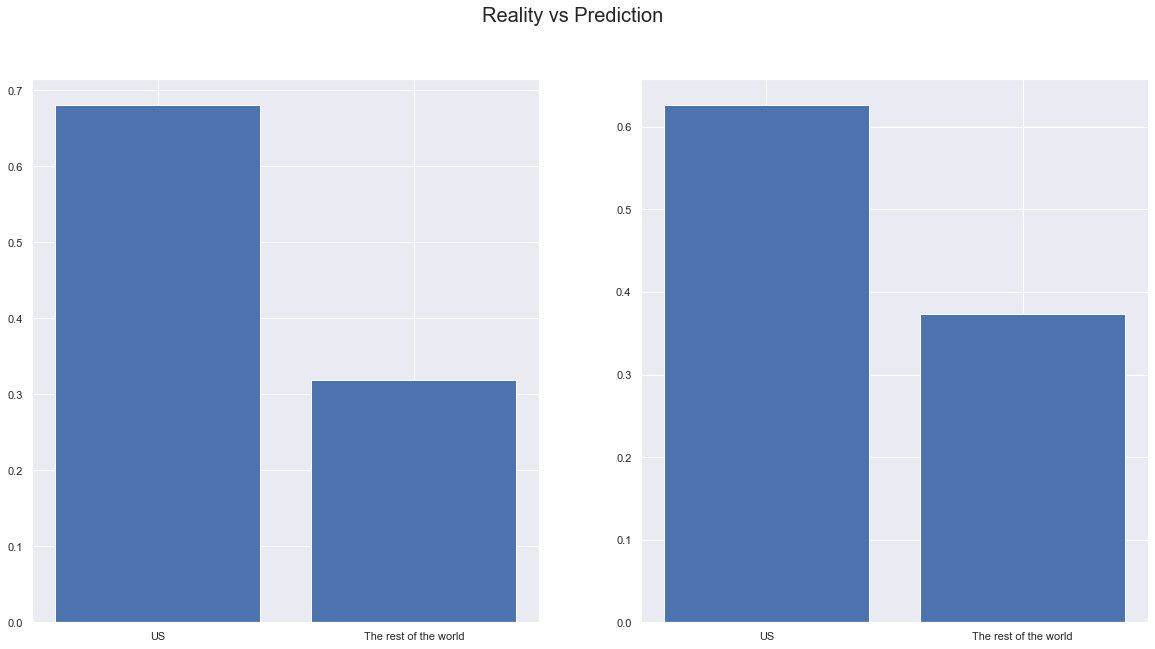

In [227]:
# Percentage of outcome numerical
num_out_perc_real = y_test.value_counts()/y_test.value_counts().sum()
#Rename index for outcome in categorical
num_out_perc_real.index = ['US', 'The rest of the world']
num_out_perc_real

### The Predicted Outcome values - viz 2' #### Percentage of outcome numerical
num_out_perc_pred = num_out_perc.value_counts()/num_out_perc.value_counts().sum()
#Rename index for outcome in categorical
num_out_perc_pred.index = ['US','The rest of the world']
num_out_perc_pred

# Prediction Vs
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].bar(num_out_perc_real.index ,num_out_perc_real )
axs[1].bar(num_out_perc_pred.index ,num_out_perc_pred)
fig.suptitle('Reality vs Prediction', fontsize=20)
plt.show()


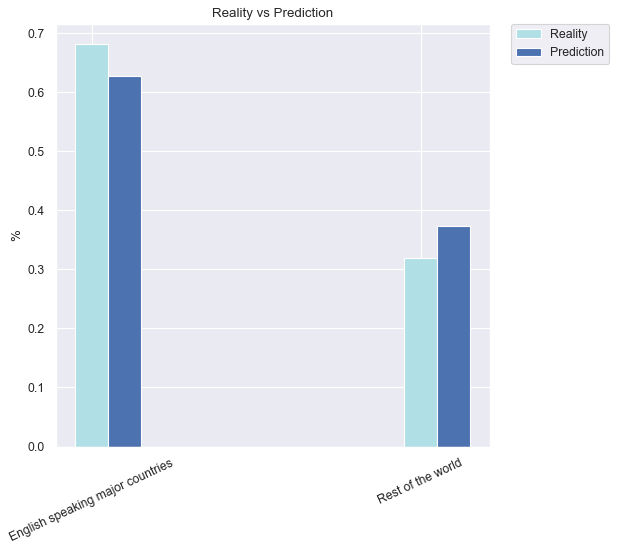

In [256]:
## Stigma. What more easely would you bring up on an interview
X = ['English speaking major countries','Rest of the world']
_X = np.arange(len(X))
plt.figure(num=None, figsize=(7,7), dpi=80, facecolor='w', edgecolor='k')
width = 0.1
plt.bar(_X , num_out_perc_real , width = width,label='Real data', color='powderblue')
plt.bar(_X + width, num_out_perc_pred ,width = width, label='Prediction')
plt.xticks(_X, X)
plt.xticks(rotation = 25)# set labels manually
plt.ylabel('%')
plt.legend(['Reality','Prediction'], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Reality vs Prediction')
#plt.savefig('Social_Stigma.png', bbox_inches='tight')
plt.show()

In [45]:
len(X_train) 

30760

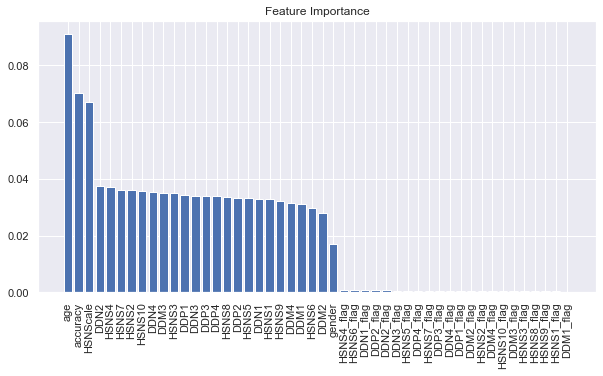

In [228]:
importances = model.feature_importances_

indices = np.argsort(importances)[::-1]

X = ds.drop(columns="cap_other",axis=1)
# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure(figsize = (10, 5))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [ ]:
#The age feature should not be relevant here, lets try the same model after removing the age feature

In [48]:
msk = np.random.rand(len(ds)) < 0.975

train = ds[msk]

test = ds[~msk]

In [49]:
X_test = test.drop(columns=["cap_other","age"],axis=1)
y_test = test.cap_other

In [50]:
train.cap_other.value_counts()

0    35872
1    15364
Name: cap_other, dtype: int64

In [51]:
from sklearn.utils import resample

ds_majority=train.loc[ds.cap_other == 0]
ds_minority = train.loc[ds.cap_other == 1]

ds_majority_downsampled = resample(ds_majority, 
                                 replace=False,     
                                 n_samples=15364,    
                                 random_state=67) 
ds_train = pd.concat([ds_majority_downsampled, ds_minority])


# Display new class counts
print (ds_train.cap_other.value_counts())


1    15364
0    15364
Name: cap_other, dtype: int64


In [52]:

X_train = ds_train.drop(columns=["cap_other","age"],axis=1)
y_train = ds_train.cap_other

In [53]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
ac = accuracy_score(y_test, y_pred)
pr = precision_score(y_test, y_pred)
rc = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accuracy:', ac, 'precision:', pr, 'recall:', rc, 'F1:', f1)

C:\Users\tvpia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy: 0.5685570710696339 precision: 0.32971014492753625 recall: 0.4406779661016949 F1: 0.37720207253886007


In [54]:
cm

array([[610, 370],
       [231, 182]], dtype=int64)

let's do the same with upsampling before trying another model

In [55]:
ds.cap_other.value_counts()

0    36852
1    15777
Name: cap_other, dtype: int64

In [56]:
msk = np.random.rand(len(ds)) < 0.975

train = ds[msk]

test = ds[~msk]

In [57]:
train.shape

(51276, 49)

In [58]:
test.shape

(1353, 49)

In [59]:

#X_train = train.drop(columns="cap_other",axis=1)
#y_train = train.cap_other

In [60]:
X_test = test.drop(columns=["cap_other","age"],axis=1)
y_test = test.cap_other

In [61]:
test.head(1)

,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,DDP1,DDP2,DDP3,DDP4,DDN1,DDN2,DDN3,DDN4,DDM1,DDM2,DDM3,DDM4,age,gender,accuracy,HSNScale,HSNS1_flag,HSNS2_flag,HSNS3_flag,HSNS4_flag,HSNS5_flag,HSNS6_flag,HSNS7_flag,HSNS8_flag,HSNS9_flag,HSNS10_flag,DDP1_flag,DDP2_flag,DDP3_flag,DDP4_flag,DDN1_flag,DDN2_flag,DDN3_flag,DDN4_flag,DDM1_flag,DDM2_flag,DDM3_flag,DDM4_flag,cap_other
27,4,4,4,2,2,4,4,2,4,1,2,1,2,5,5,4,4,2,4,4,2,3,-0.82503,1,-0.343134,0.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [62]:
train.cap_other.value_counts()

0    35908
1    15368
Name: cap_other, dtype: int64

In [63]:

ds_majority=train.loc[train.cap_other == 0]
ds_minority = train.loc[train.cap_other == 1]

ds_minority_upsampled = resample(ds_minority, 
                                 replace=True,     
                                 n_samples=35908,    
                                 random_state=67) 
ds_train = pd.concat([ds_minority_upsampled, ds_majority])


In [64]:
print (ds_train.cap_other.value_counts())

1    35908
0    35908
Name: cap_other, dtype: int64


In [65]:

X_train = ds_train.drop(columns=["cap_other","age"],axis=1)
y_train = ds_train.cap_other

In [66]:
ds_train.head(1)

,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,DDP1,DDP2,DDP3,DDP4,DDN1,DDN2,DDN3,DDN4,DDM1,DDM2,DDM3,DDM4,age,gender,accuracy,HSNScale,HSNS1_flag,HSNS2_flag,HSNS3_flag,HSNS4_flag,HSNS5_flag,HSNS6_flag,HSNS7_flag,HSNS8_flag,HSNS9_flag,HSNS10_flag,DDP1_flag,DDP2_flag,DDP3_flag,DDP4_flag,DDN1_flag,DDN2_flag,DDN3_flag,DDN4_flag,DDM1_flag,DDM2_flag,DDM3_flag,DDM4_flag,cap_other
38305,5,5,4,1,5,5,5,1,5,1,1,5,1,4,5,5,4,4,1,5,1,3,-0.917956,1,0.713834,0.72,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [67]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

C:\Users\tvpia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [68]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
ac = accuracy_score(y_test, y_pred)
pr = precision_score(y_test, y_pred)
rc = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accuracy:', ac, 'precision:', pr, 'recall:', rc, 'F1:', f1)

accuracy: 0.6674057649667405 precision: 0.36942675159235666 recall: 0.14180929095354522 F1: 0.20494699646643105


In [69]:
cm

array([[845,  99],
       [351,  58]], dtype=int64)

Let's see if we can optimize the parameters for this model before trying another one.

In [241]:
model.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [245]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=67, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 14.0min


In [ ]:
rf_random.best_params_

In [ ]:
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = x_train_res, y = y_train_res, 
                                param_name = 'n_estimators', 
                                param_range = n_estimators, cv = 3)

Now lets try with KNN model

In [17]:
k_range=range(3,23)
scores=[]

In [25]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Testing accuracy')

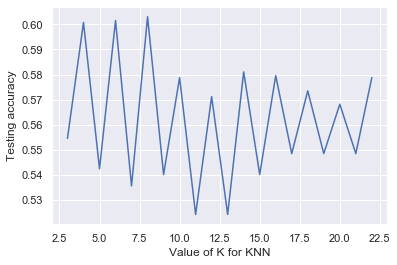

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing accuracy")

In [27]:
print(scores)

[0.5545454545454546, 0.6007575757575757, 0.5424242424242425, 0.6015151515151516, 0.5356060606060606, 0.603030303030303, 0.5401515151515152, 0.5787878787878787, 0.5242424242424243, 0.5712121212121212, 0.5242424242424243, 0.581060606060606, 0.5401515151515152, 0.5795454545454546, 0.5484848484848485, 0.5734848484848485, 0.5484848484848485, 0.5681818181818182, 0.5484848484848485, 0.5787878787878787]


In [70]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 8)  # n_neighbors means k

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [71]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
ac = accuracy_score(y_test, y_pred)
pr = precision_score(y_test, y_pred)
rc = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accuracy:', ac, 'precision:', pr, 'recall:', rc, 'F1:', f1)

accuracy: 0.5927568366592757 precision: 0.34292035398230086 recall: 0.37897310513447435 F1: 0.36004645760743326


In [72]:
cm

array([[647, 297],
       [254, 155]], dtype=int64)

Last try taking into account the results of the dozen triad test

In [109]:
ds1["DDPScale"]= round(ds.iloc[:,10:14].sum(axis=1)*5/100,2)

In [110]:
ds1["DDNScale"]= round(ds.iloc[:,14:18].sum(axis=1)*5/100,2)

In [111]:
ds1["DDMScale"]= round(ds.iloc[:,18:22].sum(axis=1)*5/100,2)

In [112]:
ds.head(1)

,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,DDP1,DDP2,DDP3,DDP4,DDN1,DDN2,DDN3,DDN4,DDM1,DDM2,DDM3,DDM4,age,gender,accuracy,country,HSNScale,HSNS1_flag,HSNS2_flag,HSNS3_flag,HSNS4_flag,HSNS5_flag,HSNS6_flag,HSNS7_flag,HSNS8_flag,HSNS9_flag,HSNS10_flag,DDP1_flag,DDP2_flag,DDP3_flag,DDP4_flag,DDN1_flag,DDN2_flag,DDN3_flag,DDN4_flag,DDM1_flag,DDM2_flag,DDM3_flag,DDM4_flag
0,2,4,5,1,4,5,4,3,3,2,1,1,4,4,2,1,1,1,1,2,2,1,37,2,98,PT,0.62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [113]:
ds1.head(1)

,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,DDP1,DDP2,DDP3,DDP4,DDN1,DDN2,DDN3,DDN4,DDM1,DDM2,DDM3,DDM4,age,gender,accuracy,country,HSNScale,HSNS1_flag,HSNS2_flag,HSNS3_flag,HSNS4_flag,HSNS5_flag,HSNS6_flag,HSNS7_flag,HSNS8_flag,HSNS9_flag,HSNS10_flag,DDP1_flag,DDP2_flag,DDP3_flag,DDP4_flag,DDN1_flag,DDN2_flag,DDN3_flag,DDN4_flag,DDM1_flag,DDM2_flag,DDM3_flag,DDM4_flag,DDPScale,DDNScale,DDMScale
0,2,4,5,1,4,5,4,3,3,2,1,1,4,4,2,1,1,1,1,2,2,1,37,2,98,PT,0.62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0.25,0.3


In [114]:
#ds1.to_csv("C:/Users/tvpia/Desktop/Final project/final-project/your-project/Datasets/ds_full.csv")

lets try again classifier models with thoses addes features

In [143]:
features = ds1[['age','accuracy']]

# Standardize features
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

ds1[['age','accuracy']]=features_std

In [144]:
eng_cap= ["US","GB","AU","NZ"]

ds1["cap_other"]=np.where(ds1.country.isin(eng_cap),0,1)

In [146]:
ds1.head(1)

,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,DDP1,DDP2,DDP3,DDP4,DDN1,DDN2,DDN3,DDN4,DDM1,DDM2,DDM3,DDM4,age,gender,accuracy,country,HSNScale,HSNS1_flag,HSNS2_flag,HSNS3_flag,HSNS4_flag,HSNS5_flag,HSNS6_flag,HSNS7_flag,HSNS8_flag,HSNS9_flag,HSNS10_flag,DDP1_flag,DDP2_flag,DDP3_flag,DDP4_flag,DDN1_flag,DDN2_flag,DDN3_flag,DDN4_flag,DDM1_flag,DDM2_flag,DDM3_flag,DDM4_flag,DDPScale,DDNScale,DDMScale,cap_other
0,2,4,5,1,4,5,4,3,3,2,1,1,4,4,2,1,1,1,1,2,2,1,1.03349,2,0.900357,PT,0.62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0.25,0.3,1


In [147]:

X = ds1.drop(columns=["cap_other","country","age","accuracy","gender"],axis=1)
y = ds1.cap_other

In [148]:
msk = np.random.rand(len(ds1)) < 0.975

train = ds1[msk]

test = ds1[~msk]

In [149]:
X_test = test.drop(columns=["cap_other","country","age","accuracy","gender"],axis=1)
y_test = test.cap_other

In [150]:
train.cap_other.value_counts()

0    35949
1    15369
Name: cap_other, dtype: int64

In [151]:
from sklearn.utils import resample

ds_majority=train.loc[ds1.cap_other == 0]
ds_minority = train.loc[ds1.cap_other == 1]

ds_majority_downsampled = resample(ds_majority, 
                                 replace=False,     
                                 n_samples=15388,    
                                 random_state=67) 
ds_train = pd.concat([ds_majority_downsampled, ds_minority])


# Display new class counts
print (ds_train.cap_other.value_counts())


0    15388
1    15369
Name: cap_other, dtype: int64


In [152]:

X_train = ds_train.drop(columns=["cap_other","country","age","accuracy","gender"],axis=1)
y_train = ds_train.cap_other

In [153]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

C:\Users\tvpia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [154]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
ac = accuracy_score(y_test, y_pred)
pr = precision_score(y_test, y_pred)
rc = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accuracy:', ac, 'precision:', pr, 'recall:', rc, 'F1:', f1)

accuracy: 0.5758962623951183 precision: 0.34959349593495936 recall: 0.4215686274509804 F1: 0.3822222222222222


In [157]:
cm

array([[583, 320],
       [236, 172]], dtype=int64)

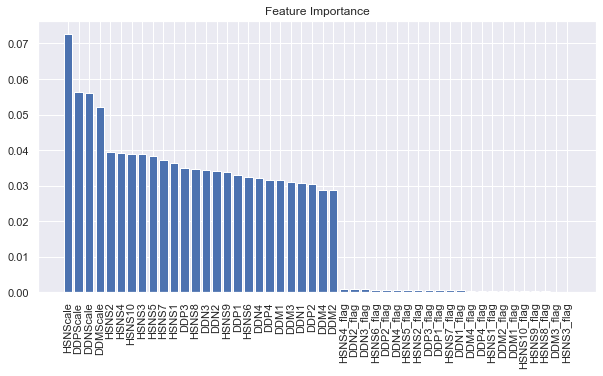

In [156]:
importances = model.feature_importances_

indices = np.argsort(importances)[::-1]

X = ds1.drop(columns=["cap_other","country","age","accuracy","gender"],axis=1)
# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure(figsize = (10, 5))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()

Now testing logistic regression and SVM with only psychological test results

In [158]:
ds1.head()

,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,DDP1,DDP2,DDP3,DDP4,DDN1,DDN2,DDN3,DDN4,DDM1,DDM2,DDM3,DDM4,age,gender,accuracy,country,HSNScale,HSNS1_flag,HSNS2_flag,HSNS3_flag,HSNS4_flag,HSNS5_flag,HSNS6_flag,HSNS7_flag,HSNS8_flag,HSNS9_flag,HSNS10_flag,DDP1_flag,DDP2_flag,DDP3_flag,DDP4_flag,DDN1_flag,DDN2_flag,DDN3_flag,DDN4_flag,DDM1_flag,DDM2_flag,DDM3_flag,DDM4_flag,DDPScale,DDNScale,DDMScale,cap_other
0,2,4,5,1,4,5,4,3,3,2,1,1,4,4,2,1,1,1,1,2,2,1,1.033490,2,0.900357,PT,0.62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.50,0.25,0.30,1
1,4,2,2,4,3,4,4,5,4,3,4,4,2,4,3,2,2,3,4,4,4,3,0.754712,3,0.713834,PL,0.64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.70,0.50,0.75,1
2,5,5,5,4,2,5,5,4,4,2,2,2,2,4,4,2,4,3,3,4,4,2,-0.360400,2,-0.218785,AU,0.78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.50,0.65,0.65,0
3,4,1,2,2,4,5,2,2,5,2,4,2,4,0,5,5,4,1,4,2,3,4,-0.174548,1,0.962532,US,0.54,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.50,0.75,0.65,0
4,5,3,4,5,5,5,4,5,4,3,4,3,4,4,4,2,5,2,4,4,1,5,-0.453326,2,0.402961,US,0.80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.75,0.65,0.70,0


In [160]:
from sklearn.linear_model import LogisticRegression
ds2 = ds1.copy()
X = ds2[["HSNScale","DDPScale","DDMScale"]]
y = ds2.cap_other

In [161]:
msk = np.random.rand(len(ds2)) < 0.975

train = ds2[msk]

test = ds2[~msk]

In [162]:
X_test = test[["HSNScale","DDPScale","DDMScale"]]
y_test = test.cap_other

In [163]:
train.cap_other.value_counts()

0    35954
1    15426
Name: cap_other, dtype: int64

In [164]:
from sklearn.utils import resample

ds_majority=train.loc[ds2.cap_other == 0]
ds_minority = train.loc[ds2.cap_other == 1]

ds_majority_downsampled = resample(ds_majority, 
                                 replace=False,     
                                 n_samples=15388,    
                                 random_state=67) 
ds_train = pd.concat([ds_majority_downsampled, ds_minority])


# Display new class counts
print (ds_train.cap_other.value_counts())

1    15426
0    15388
Name: cap_other, dtype: int64


In [165]:

X_train = ds_train[["HSNScale","DDPScale","DDMScale"]]
y_train = ds_train.cap_other

In [166]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\tvpia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [167]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
ac = accuracy_score(y_test, y_pred)
pr = precision_score(y_test, y_pred)
rc = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accuracy:', ac, 'precision:', pr, 'recall:', rc, 'F1:', f1)

accuracy: 0.5044035228182546 precision: 0.29127725856697817 recall: 0.5327635327635327 F1: 0.3766364551863041


In [168]:
cm

array([[443, 455],
       [164, 187]], dtype=int64)

same with SVM

In [169]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

C:\Users\tvpia\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [170]:
y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
ac = accuracy_score(y_test, y_pred)
pr = precision_score(y_test, y_pred)
rc = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [171]:
print('accuracy:', ac, 'precision:', pr, 'recall:', rc, 'F1:', f1)

accuracy: 0.48278622898318657 precision: 0.2852983988355167 recall: 0.5584045584045584 F1: 0.3776493256262042


In [172]:
cm

array([[407, 491],
       [155, 196]], dtype=int64)

## RandomForestClassifier after resampling was the best performing model, taking into account not only accuracy but also precision and recall score. Let's proceed to unsupervised learning in another notebook